<a href="https://colab.research.google.com/github/FKz11/study_mpei/blob/main/urmu_lab_123.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Обработка данных лабораторных работ 1,2,3

### Загружаем библиотеки

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### Загружаем реальные и идеальные данные 

*** Предварительно руками исправили первую строчку в файлах с реальными данными так, чтобы между названиями столбцов был разделитель 2 пробела. ***

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
data1_ideal=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab1_ideal.txt", sep=' ', names=['Vx_o', 'Vy_o', 'dpsi'])
data2_ideal=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab2_ideal.txt", sep=' ', names=['Vx_o', 'Vy_o', 'dpsi'])
data3_ideal=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab3_ideal.txt", sep=' ', names=['Vx_o', 'Vy_o', 'dpsi'])
data1_ideal.head()

,Vx_o,Vy_o,dpsi
0,0.0,0.2,0
1,0.0,0.2,0
2,0.0,0.2,0
3,0.0,0.2,0
4,0.0,0.2,0


In [ ]:
data1_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab1_real.txt", sep='  ', engine='python')
data2_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab2_real.txt", sep='  ', engine='python')
data3_real=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/lab3_real.txt", sep='  ', engine='python')
data1_real.head()

,t,omega_1,omega_2,omega_3,omega_4,M1,M2,M3,M4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.1,-0.0000,0.0000,-0.0000,0.0122,0.1835,-0.1368,-0.3514,-0.0026,0.0002,-0.0002,0.0004,0.0000,-0.0000,0.0000
1,0.2,-0.8309,0.7214,0.9362,-1.0943,-1.4948,1.5883,1.1979,-1.6212,-0.0033,0.0448,-0.0155,-0.0003,0.0045,-0.0015
2,0.3,-1.9333,2.2372,2.2251,-2.4318,-1.5450,1.3797,1.1235,-1.4516,0.0012,0.1103,-0.0158,-0.0002,0.0155,-0.0031
3,0.4,-2.8857,2.9911,3.1167,-3.1532,-1.4723,1.4291,1.0716,-1.4559,0.0009,0.1518,-0.0128,-0.0000,0.0307,-0.0044
4,0.5,-4.2921,3.3599,3.7611,-3.8908,-1.0352,1.5944,1.0093,-1.3442,-0.0133,0.1913,0.0000,-0.0013,0.0498,-0.0044


### Формируем идеальные и реальные данные

In [ ]:
column_names_ideal = ['t', 'omega_1', 'omega_2', 'omega_3', 'omega_4', 'Vx_o', 'Vy_o', 'dpsi', 'x0', 'y0', 'psi']
column_names_real = ['t', 'omega_1', 'omega_2', 'omega_3', 'omega_4', 'Vx_o', 'Vy_o', 'dpsi', 'x0', 'y0', 'psi', 'M1', 'M2', 'M3', 'M4']

In [ ]:
dt=0.1

Функция для нахождения угловых скоростей колёс по заданным скоростям платформы

In [ ]:
l = 0.15
h = 0.235
R = 0.05

In [ ]:
def get_omega(data_ideal, l, h, R):
  omega1 = (data_ideal['Vx_o']-data_ideal['Vy_o']-(h+l)*data_ideal['dpsi'])/R
  omega2 = (data_ideal['Vx_o']+data_ideal['Vy_o']+(h+l)*data_ideal['dpsi'])/R
  omega3 = (data_ideal['Vx_o']+data_ideal['Vy_o']-(h+l)*data_ideal['dpsi'])/R
  omega4 = (data_ideal['Vx_o']-data_ideal['Vy_o']+(h+l)*data_ideal['dpsi'])/R
  return omega1, omega2, omega3, omega4

Функция для перехода из локальных скоростей в глобальные

In [ ]:
def loc2glob_v(X_loc, Y_loc, Psi):
  X_glob=[]
  Y_glob=[]
  for i in range(len(X_loc)):
    X_glob.append(X_loc[i]*np.cos(Psi[i]) - Y_loc[i]*np.sin(Psi[i]))
    Y_glob.append(X_loc[i]*np.sin(Psi[i]) + Y_loc[i]*np.cos(Psi[i]))
  return X_glob, Y_glob

Функция общего вида для перехода в глобальные координаты

In [ ]:
# Пока в отчёте не участвует
def loc2glob_p(X_loc, Y_loc, Psi):
  steps_X_loc = X_loc - np.concatenate(([0], X_loc[:-1]))
  steps_Y_loc = Y_loc - np.concatenate(([0], Y_loc[:-1]))
  X_glob_sum=0
  Y_glob_sum=0
  X_glob=[]
  Y_glob=[]
  for i in range(len(X_loc)):
    X_glob_sum+=steps_X_loc[i]*np.cos(Psi[i]) - steps_Y_loc[i]*np.sin(Psi[i])
    Y_glob_sum+=steps_X_loc[i]*np.sin(Psi[i]) + steps_Y_loc[i]*np.cos(Psi[i])
    X_glob.append(X_glob_sum)
    Y_glob.append(Y_glob_sum)
  return X_glob, Y_glob

Функция общего вида для перехода в локальные координаты

In [ ]:
# Пока в отчёте не участвует
def glob2loc_p(X_glob, Y_glob, Psi):
  steps_X_glob = X_glob - np.concatenate(([0], X_glob[:-1]))
  steps_Y_glob = Y_glob - np.concatenate(([0], Y_glob[:-1]))
  X_loc_sum=0
  Y_loc_sum=0
  X_loc=[]
  Y_loc=[]
  for i in range(len(X_glob)):
    step_X_loc = (steps_X_glob[i]+steps_Y_glob[i]*np.tan(Psi[i]))/(np.cos(Psi[i])+np.sin(Psi[i])*np.tan(Psi[i]))
    X_loc_sum+=step_X_loc
    Y_loc_sum+=(steps_Y_glob[i]-step_X_loc*np.sin(Psi[i]))/np.cos(Psi[i])
    X_loc.append(X_loc_sum)
    Y_loc.append(Y_loc_sum)
  return X_loc, Y_loc

Функция для нахождения координат в каждой точке по скоростям как интеграл V по dt

In [ ]:
def integral(V, dt):
  Integral_V=[]
  sum=0
  for v in V:
    Integral_V.append(sum)
    sum+=v*dt
  return np.array(Integral_V)

Функция для формирования df_ideal

In [ ]:
def get_df_ideal(data_ideal):
  df_ideal = data_ideal.copy()
  (df_ideal['omega_1'], df_ideal['omega_2'], df_ideal['omega_3'], df_ideal['omega_4']) = get_omega(df_ideal, l, h, R)
  df_ideal['psi'] = integral(df_ideal['dpsi'], dt)
  df_ideal['Vx_o'], df_ideal['Vy_o'] = loc2glob_v(df_ideal['Vx_o'], df_ideal['Vy_o'], df_ideal['psi'])
  df_ideal['t'], df_ideal['x0'], df_ideal['y0'] = integral([1]*len(df_ideal), dt), integral(df_ideal['Vx_o'], dt), integral(df_ideal['Vy_o'], dt)
  df_ideal = df_ideal.reindex(columns=column_names_ideal)
  return df_ideal

Функция для формирования df_real

In [ ]:
def get_df_real(data_real):
  df_real = data_real.copy()
  # Пересчитываем координаты, так как они были посчитаны с запаздыванием на 1 позицию :))
  df_real['psi'] = integral(df_real['dpsi'], dt)
  df_real['Vx_o'], df_real['Vy_o'] = loc2glob_v(df_real['Vx_o'], df_real['Vy_o'], df_real['psi'])
  # df_real['x0'], df_real['y0'] = integral(df_real['Vx_o'], dt), integral(df_real['Vy_o'], dt)
  df_real = df_real.reindex(columns=column_names_real, )
  return df_real

Функция добавления локальных координат к df_real

In [ ]:
# Пока в отчёте не участвует
def get_df_real_loc(df_real):
  df_real['x0_loc'], df_real['y0_loc'] = glob2loc_p(df_real['x0'], df_real['y0'], df_real['psi'])
  return df_real

Функция для вывода графиков omega от t

In [ ]:
def plot_om(df):
  fig, ax = plt.subplots(nrows=4)
  ax1, ax2, ax3, ax4 = ax.flatten()

  ax1.plot(df['t'], df['omega_1'])
  ax1.set_title("Omega_1")
  ax1.set_xlabel("t, c", fontsize=12)
  ax1.set_ylabel("Om, 1/c", fontsize=12)
  ax1.set_yticks([0, min(df['omega_1']), max(df['omega_1'])])
  ax1.set_xticks(list(ax1.get_xticks()) + [min(df['t']), max(df['t'])])
  ax1.set_ylim(min(ax1.get_yticks()), max(ax1.get_yticks())+0.2)
  ax1.set_xlim(min(df['t']), max(df['t']))

  ax2.plot(df['t'], df['omega_2'])
  ax2.set_title("Omega_2")
  ax2.set_xlabel("t, c", fontsize=12)
  ax2.set_ylabel("Om, 1/c", fontsize=12)
  ax2.set_yticks([0, min(df['omega_2']), max(df['omega_2'])])
  ax2.set_xticks(list(ax2.get_xticks()) + [min(df['t']), max(df['t'])])
  ax2.set_ylim(min(ax2.get_yticks()), max(ax2.get_yticks())+0.2)
  ax2.set_xlim(min(df['t']), max(df['t']))

  ax3.plot(df['t'], df['omega_3'])
  ax3.set_title("Omega_3")
  ax3.set_xlabel("t, c", fontsize=12)
  ax3.set_ylabel("Om, 1/c", fontsize=12)
  ax3.set_yticks([0, min(df['omega_3']), max(df['omega_3'])])
  ax3.set_xticks(list(ax3.get_xticks()) + [min(df['t']), max(df['t'])])
  ax3.set_ylim(min(ax3.get_yticks()), max(ax3.get_yticks())+0.2)
  ax3.set_xlim(min(df['t']), max(df['t']))

  ax4.plot(df['t'], df['omega_4'])
  ax4.set_title("Omega_4")
  ax4.set_xlabel("t, c", fontsize=12)
  ax4.set_ylabel("Om, 1/c", fontsize=12)
  ax4.set_yticks([0, min(df['omega_4']), max(df['omega_4'])])
  ax4.set_xticks(list(ax4.get_xticks()) + [min(df['t']), max(df['t'])])
  ax4.set_ylim(min(ax4.get_yticks()), max(ax4.get_yticks())+0.2)
  ax4.set_xlim(min(df['t']), max(df['t']))

  fig.set_size_inches(8, 7)
  plt.subplots_adjust(hspace=1)

Функция для вывода графиков x, y, psi от t

In [ ]:
def plot_x_y_psi(df):
  fig, ax = plt.subplots(nrows=3)
  ax1, ax2, ax3 = ax.flatten()

  ax1.plot(df['t'], df['x0'])
  ax1.set_title("X")
  ax1.set_xlabel("t, c", fontsize=12)
  ax1.set_ylabel("X, m", fontsize=12)
  ax1.set_yticks([0, min(df['x0']), max(df['x0'])])
  ax1.set_xticks(list(ax1.get_xticks()) + [min(df['t']), max(df['t'])])
  ax1.set_ylim(min(ax1.get_yticks()), max(ax1.get_yticks()))
  ax1.set_xlim(min(df['t']), max(df['t']))

  ax2.plot(df['t'], df['y0'])
  ax2.set_title("Y")
  ax2.set_xlabel("t, c", fontsize=12)
  ax2.set_ylabel("Y, m", fontsize=12)
  ax2.set_yticks([0, min(df['y0']), max(df['y0'])])
  ax2.set_xticks(list(ax2.get_xticks()) + [min(df['t']), max(df['t'])])
  ax2.set_ylim(min(ax2.get_yticks()), max(ax2.get_yticks()))
  ax2.set_xlim(min(df['t']), max(df['t']))

  ax3.plot(df['t'], df['psi'])
  ax3.set_title("Psi")
  ax3.set_xlabel("t, c", fontsize=12)
  ax3.set_ylabel("Psi, rad", fontsize=12)
  ax3.set_yticks([0, min(df['psi']), max(df['psi'])])
  ax3.set_xticks(list(ax3.get_xticks()) + [min(df['t']), max(df['t'])])
  ax3.set_ylim(min(ax3.get_yticks()), max(ax3.get_yticks())) #+0.0001
  ax3.set_xlim(min(df['t']), max(df['t']))

  fig.set_size_inches(8, 7)
  plt.subplots_adjust(hspace=1)

lab1

In [ ]:
df1_ideal = get_df_ideal(data1_ideal)
df1_ideal.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.0,-4.0,4.0,4.0,-4.0,0.0,0.2,0,0.0,0.00,0.0
1,0.1,-4.0,4.0,4.0,-4.0,0.0,0.2,0,0.0,0.02,0.0
2,0.2,-4.0,4.0,4.0,-4.0,0.0,0.2,0,0.0,0.04,0.0
3,0.3,-4.0,4.0,4.0,-4.0,0.0,0.2,0,0.0,0.06,0.0
4,0.4,-4.0,4.0,4.0,-4.0,0.0,0.2,0,0.0,0.08,0.0


In [ ]:
df1_real = get_df_real(data1_real)
df1_real.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi,M1,M2,M3,M4
0,0.1,-0.0000,0.0000,-0.0000,0.0122,0.000200,-0.000200,0.0004,0.0000,-0.0000,0.00000,0.1835,-0.1368,-0.3514,-0.0026
1,0.2,-0.8309,0.7214,0.9362,-1.0943,-0.003302,0.044800,-0.0155,-0.0003,0.0045,0.00004,-1.4948,1.5883,1.1979,-1.6212
2,0.3,-1.9333,2.2372,2.2251,-2.4318,0.001367,0.110298,-0.0158,-0.0002,0.0155,-0.00151,-1.5450,1.3797,1.1235,-1.4516
3,0.4,-2.8857,2.9911,3.1167,-3.1532,0.001369,0.151796,-0.0128,-0.0000,0.0307,-0.00309,-1.4723,1.4291,1.0716,-1.4559
4,0.5,-4.2921,3.3599,3.7611,-3.8908,-0.012464,0.191356,0.0000,-0.0013,0.0498,-0.00437,-1.0352,1.5944,1.0093,-1.3442


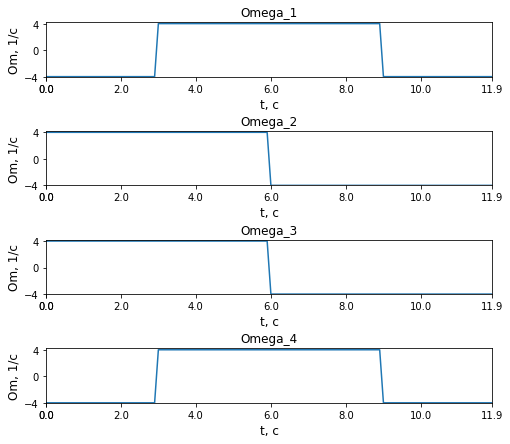

In [ ]:
plot_om(df1_ideal)

lab2

In [ ]:
df2_ideal = get_df_ideal(data2_ideal)
df2_ideal.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.0,3.225368,-3.225368,3.225368,-3.225368,0.0,0.0,-0.418879,0.0,0.0,0.000000
1,0.1,3.225368,-3.225368,3.225368,-3.225368,0.0,0.0,-0.418879,0.0,0.0,-0.041888
2,0.2,3.225368,-3.225368,3.225368,-3.225368,0.0,0.0,-0.418879,0.0,0.0,-0.083776
3,0.3,3.225368,-3.225368,3.225368,-3.225368,0.0,0.0,-0.418879,0.0,0.0,-0.125664
4,0.4,3.225368,-3.225368,3.225368,-3.225368,0.0,0.0,-0.418879,0.0,0.0,-0.167552


In [ ]:
df2_real = get_df_real(data2_real)
df2_real.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi,M1,M2,M3,M4
0,0.1,-0.0000,0.0000,-0.0000,0.0041,0.000100,-0.000100,0.0001,0.0000,-0.0000,0.00000,0.1134,-0.5185,0.0320,0.4085
1,0.2,1.8117,-1.8117,1.5928,-1.4874,0.001300,-0.006800,-0.2176,0.0001,-0.0007,0.00001,0.7652,-1.2291,0.8067,-0.3757
2,0.3,2.7398,-2.5412,2.3102,-2.0346,0.005644,-0.011826,-0.3125,0.0007,-0.0019,-0.02175,0.5972,-1.1564,0.7963,-0.5341
3,0.4,2.9668,-2.9911,3.1654,-2.9911,0.002030,0.002396,-0.3933,0.0009,-0.0016,-0.05300,0.6578,-1.1382,0.5843,-0.3177
4,0.5,3.1532,-3.0032,2.9668,-3.1046,0.000098,-0.001114,-0.3970,0.0009,-0.0017,-0.09233,0.7245,-1.2559,0.8560,-0.4077


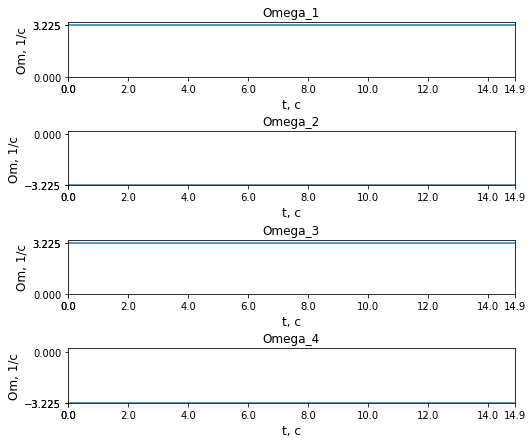

In [ ]:
plot_om(df2_ideal)

lab3

In [ ]:
df3_ideal = get_df_ideal(data3_ideal)
df3_ideal.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.0,9.1359,-1.1359,9.1359,-1.1359,0.200000,0.000000,-0.667,0.000000,0.000000,0.0000
1,0.1,9.1359,-1.1359,9.1359,-1.1359,0.199555,-0.013330,-0.667,0.020000,0.000000,-0.0667
2,0.2,9.1359,-1.1359,9.1359,-1.1359,0.198223,-0.026601,-0.667,0.039956,-0.001333,-0.1334
3,0.3,9.1359,-1.1359,9.1359,-1.1359,0.196009,-0.039753,-0.667,0.059778,-0.003993,-0.2001
4,0.4,9.1359,-1.1359,9.1359,-1.1359,0.192924,-0.052729,-0.667,0.079379,-0.007968,-0.2668


In [ ]:
df3_real = get_df_real(data3_real)
df3_real.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi,M1,M2,M3,M4
0,0.1,-0.0000,0.0122,-0.0041,0.0000,0.000100,0.000100,0.0005,0.0000,0.0000,0.00000,0.1394,0.0338,0.0762,0.1004
1,0.2,3.2099,-0.0648,3.8219,-0.5471,0.080199,0.013704,-0.2482,0.0080,0.0014,0.00005,1.9519,-0.4821,1.8549,-0.0788
2,0.3,6.6914,-0.0648,6.6630,-0.8552,0.155588,0.005648,-0.4635,0.0236,0.0019,-0.02477,1.7104,-0.7807,1.6783,-0.0969
3,0.4,8.7706,-0.5715,9.3137,-1.0862,0.205719,-0.001422,-0.6410,0.0442,0.0018,-0.07112,1.7883,-0.5782,1.4403,-0.0943
4,0.5,10.2378,-0.7457,11.0281,-1.2524,0.240786,-0.016410,-0.7553,0.0683,0.0002,-0.13522,1.6169,-0.6812,0.8933,-0.0857


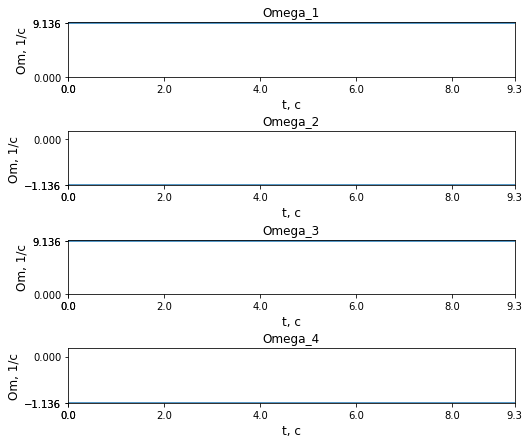

In [ ]:
plot_om(df3_ideal)

### Найдём отклонения

In [ ]:
columns_for_difference = ['omega_1', 'omega_2', 'omega_3', 'omega_4', 'Vx_o', 'Vy_o',	'dpsi',	'x0',	'y0',	'psi']

lab1

In [ ]:
ddf1 = df1_ideal[['t']+columns_for_difference]
ddf1[columns_for_difference] -= df1_real[columns_for_difference]
ddf1.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.0,-4.0000,4.0000,4.0000,-4.0122,-0.000200,0.200200,-0.0004,0.0000,0.0000,0.00000
1,0.1,-3.1691,3.2786,3.0638,-2.9057,0.003302,0.155200,0.0155,0.0003,0.0155,-0.00004
2,0.2,-2.0667,1.7628,1.7749,-1.5682,-0.001367,0.089702,0.0158,0.0002,0.0245,0.00151
3,0.3,-1.1143,1.0089,0.8833,-0.8468,-0.001369,0.048204,0.0128,0.0000,0.0293,0.00309
4,0.4,0.2921,0.6401,0.2389,-0.1092,0.012464,0.008644,0.0000,0.0013,0.0302,0.00437


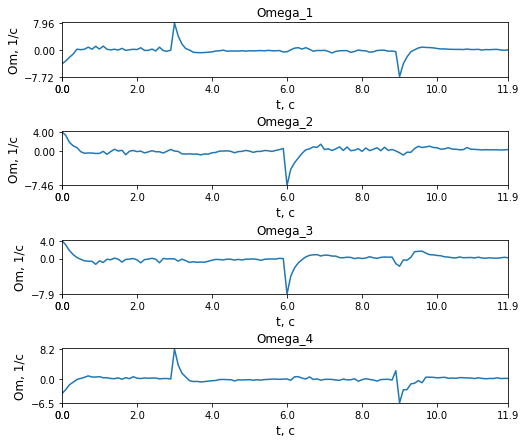

In [ ]:
plot_om(ddf1)

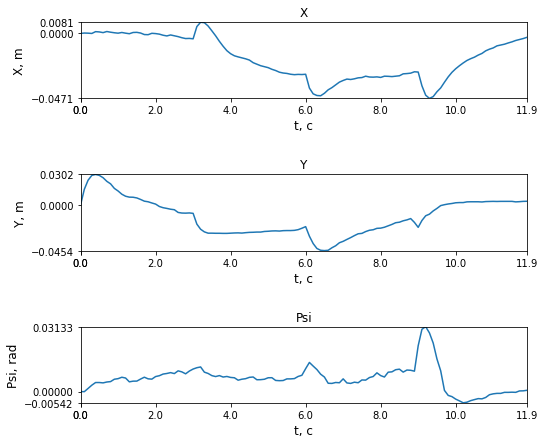

In [ ]:
plot_x_y_psi(ddf1)

lab2

In [ ]:
ddf2 = df2_ideal[['t']+columns_for_difference]
ddf2[columns_for_difference] -= df2_real[columns_for_difference]
ddf2.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.0,3.225368,-3.225368,3.225368,-3.229468,-0.000100,0.000100,-0.418979,0.0000,0.0000,0.000000
1,0.1,1.413668,-1.413668,1.632568,-1.737968,-0.001300,0.006800,-0.201279,-0.0001,0.0007,-0.041898
2,0.2,0.485568,-0.684168,0.915168,-1.190768,-0.005644,0.011826,-0.106379,-0.0007,0.0019,-0.062026
3,0.3,0.258568,-0.234268,0.059968,-0.234268,-0.002030,-0.002396,-0.025579,-0.0009,0.0016,-0.072664
4,0.4,0.072168,-0.222168,0.258568,-0.120768,-0.000098,0.001114,-0.021879,-0.0009,0.0017,-0.075222


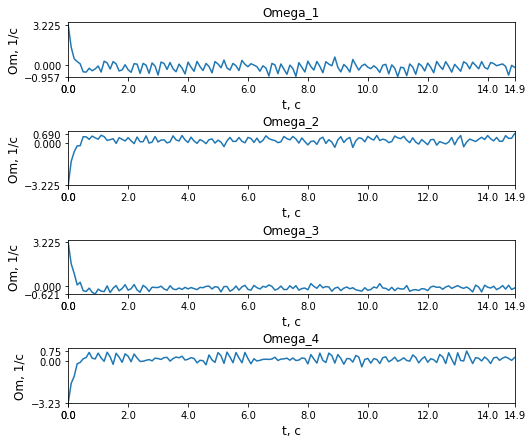

In [ ]:
plot_om(ddf2)

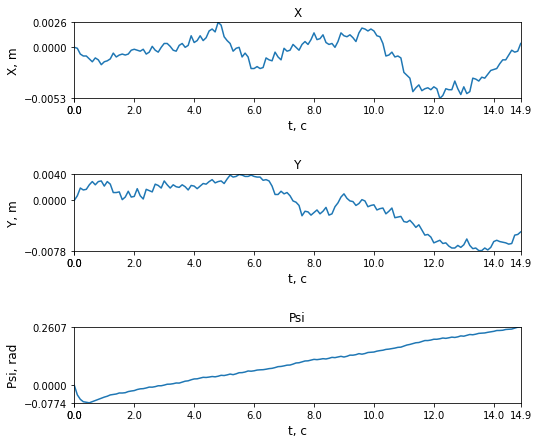

In [ ]:
plot_x_y_psi(ddf2)

lab3

In [ ]:
ddf3 = df3_ideal[['t']+columns_for_difference]
ddf3[columns_for_difference] -= df3_real[columns_for_difference]
ddf3.head()

,t,omega_1,omega_2,omega_3,omega_4,Vx_o,Vy_o,dpsi,x0,y0,psi
0,0.0,9.1359,-1.1481,9.1400,-1.1359,0.199900,-0.000100,-0.6675,0.000000,0.000000,0.00000
1,0.1,5.9260,-1.0711,5.3140,-0.5888,0.119356,-0.027034,-0.4188,0.012000,-0.001400,-0.06675
2,0.2,2.4445,-1.0711,2.4729,-0.2807,0.042635,-0.032249,-0.2035,0.016356,-0.003233,-0.10863
3,0.3,0.3653,-0.5644,-0.1778,-0.0497,-0.009710,-0.038331,-0.0260,0.015578,-0.005793,-0.12898
4,0.4,-1.1019,-0.3902,-1.8922,0.1165,-0.047862,-0.036319,0.0883,0.011079,-0.008168,-0.13158


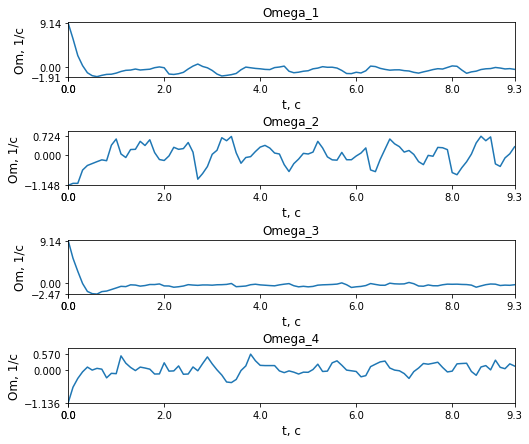

In [ ]:
plot_om(ddf3)

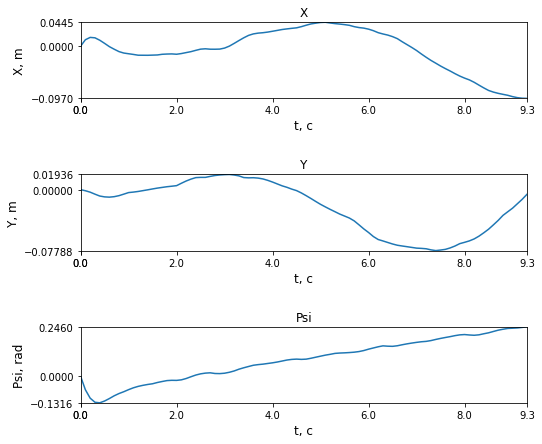

In [ ]:
plot_x_y_psi(ddf3)

### Найдём время запаздывания и восстановим координаты

In [ ]:
# Как в инструкции
def get_v1(df_ideal, df_real, ddf, dt):
  eps = 0.1**32
  Bx = (ddf['x0'].values-integral(ddf['Vx_o'], dt))
  Ax = df_ideal['Vx_o'].values
  dtzap_x = (1/(Ax.T@Ax+eps))*(Ax.T@Bx)
  By = (ddf['y0'].values-integral(ddf['Vy_o'], dt))
  Ay = df_ideal['Vy_o'].values
  dtzap_y = (1/(Ay.T@Ay+eps))*(Ay.T@By)
  Bpsi = (ddf['psi'].values-integral(ddf['dpsi'], dt))
  Apsi = df_ideal['dpsi'].values
  dtzap_psi = (1/(Apsi.T@Apsi+eps))*(Apsi.T@Bpsi)
  df_v = df_ideal[['t']].copy()
  df_v['x0'] = (df_real['x0'].values + df_ideal['Vx_o'].values*dtzap_x + integral(ddf['Vx_o'], dt))
  df_v['y0'] = (df_real['y0'].values + df_ideal['Vy_o'].values*dtzap_y + integral(ddf['Vy_o'], dt))
  df_v['psi'] = (df_real['psi'].values + df_ideal['dpsi'].values*dtzap_psi + integral(ddf['dpsi'], dt))
  ddf_iv = df_ideal[['t']].copy()
  ddf_iv['x0'] = df_ideal['x0'] - df_v['x0']
  ddf_iv['y0'] = df_ideal['y0'] - df_v['y0']
  ddf_iv['psi'] = df_ideal['psi'] - df_v['psi']
  return dtzap_x, dtzap_y, dtzap_psi, df_v, ddf_iv

In [ ]:
# Как на самом деле :))
def get_v2(df_ideal, df_real, ddf, dt):
  eps = 0.1**32
  B_x = (ddf['x0'].values-integral(ddf['Vx_o'], dt))
  A_x = df_ideal['Vx_o'].values
  dtzap_x = (1/(A_x.T@A_x+eps))*(A_x.T@B_x)
  B_y = (ddf['y0'].values-integral(ddf['Vy_o'], dt))
  A_y = df_ideal['Vy_o'].values
  dtzap_y = (1/(A_y.T@A_y+eps))*(A_y.T@B_y)
  B_psi = (ddf['psi'].values-integral(ddf['dpsi'], dt))
  A_psi = df_ideal['dpsi'].values
  dtzap_psi = (1/(A_psi.T@A_psi+eps))*(A_psi.T@B_psi)
  df_v = df_ideal[['t']].copy()
  df_v['x0'] = (df_real['x0'].values + df_real['Vx_o'].values*dtzap_x)
  df_v['y0'] = (df_real['y0'].values + df_real['Vy_o'].values*dtzap_y)
  df_v['psi'] = (df_real['psi'].values + df_real['dpsi'].values*dtzap_psi)
  ddf_iv = df_ideal[['t']].copy()
  ddf_iv['x0'] = df_ideal['x0'] - df_v['x0']
  ddf_iv['y0'] = df_ideal['y0'] - df_v['y0']
  ddf_iv['psi'] = df_ideal['psi'] - df_v['psi']
  return dtzap_x, dtzap_y, dtzap_psi, df_v, ddf_iv

lab1

In [ ]:
dtzap1_x, dtzap1_y, dtzap1_psi, df1_v, ddf1_iv = get_v1(df1_ideal, df1_real, ddf1, dt)
print("Время запаздывания по x: ", dtzap1_x)
print("Время запаздывания по y: ", dtzap1_y)
print("Время запаздывания по psi: ", dtzap1_psi)
print("Восстановленные координаты: \n")
ddf1_iv.head()

Время запаздывания по x:  -0.10085549005660967
Время запаздывания по y:  -0.09784377860459156
Время запаздывания по psi:  0.0
Восстановленные координаты: 



,t,x0,y0,psi
0,0.0,0.000000,0.019569,0.0
1,0.1,0.000320,0.015049,0.0
2,0.2,-0.000110,0.008529,0.0
3,0.3,-0.000174,0.004359,0.0
4,0.4,0.001263,0.000438,0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.


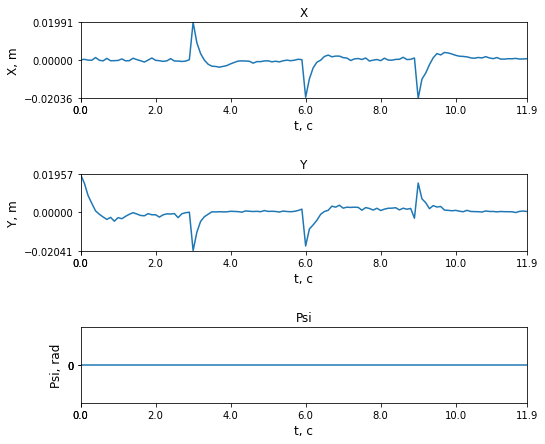

In [ ]:
plot_x_y_psi(ddf1_iv)

lab2

In [ ]:
dtzap2_x, dtzap2_y, dtzap2_psi, df2_v, ddf2_iv = get_v1(df2_ideal, df2_real, ddf2, dt)
print("Время запаздывания по x: ", dtzap2_x)
print("Время запаздывания по y: ", dtzap2_y)
print("Время запаздывания по psi: ", dtzap2_psi)
print("Восстановленные координаты: \n")
ddf2_iv.head()

Время запаздывания по x:  0.0
Время запаздывания по y:  0.0
Время запаздывания по psi:  7.855155598257399e-15
Восстановленные координаты: 



,t,x0,y0,psi
0,0.0,0.000000,0.000000,3.290360e-15
1,0.1,-0.000090,0.000690,3.289036e-15
2,0.2,-0.000560,0.001210,3.289036e-15
3,0.3,-0.000196,-0.000273,3.302913e-15
4,0.4,0.000007,0.000067,3.302913e-15


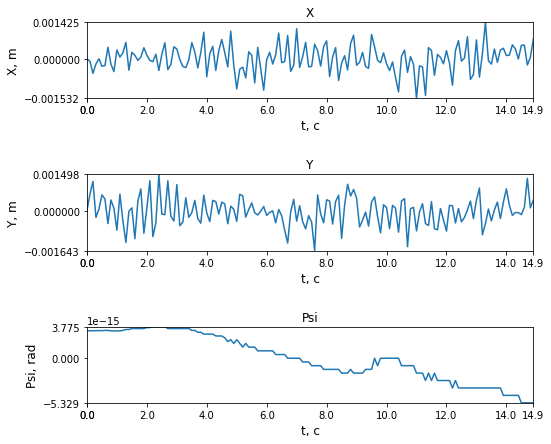

In [ ]:
plot_x_y_psi(ddf2_iv)

lab3

In [ ]:
dtzap3_x, dtzap3_y, dtzap3_psi, df3_v, ddf3_iv = get_v1(df3_ideal, df3_real, ddf3, dt)
print("Время запаздывания по x: ", dtzap3_x)
print("Время запаздывания по y: ", dtzap3_y)
print("Время запаздывания по psi: ", dtzap3_psi)
print("Восстановленные координаты: \n")
ddf3_iv.head()

Время запаздывания по x:  -0.10545756143157488
Время запаздывания по y:  -0.1019847367333574
Время запаздывания по psi:  -5.259395603502997e-16
Восстановленные координаты: 



,t,x0,y0,psi
0,0.0,0.021092,0.000000,-3.508017e-16
1,0.1,0.013055,-0.002749,-3.608225e-16
2,0.2,0.005334,-0.003232,-3.608225e-16
3,0.3,0.000059,-0.003909,-3.608225e-16
4,0.4,-0.003794,-0.003775,-3.885781e-16


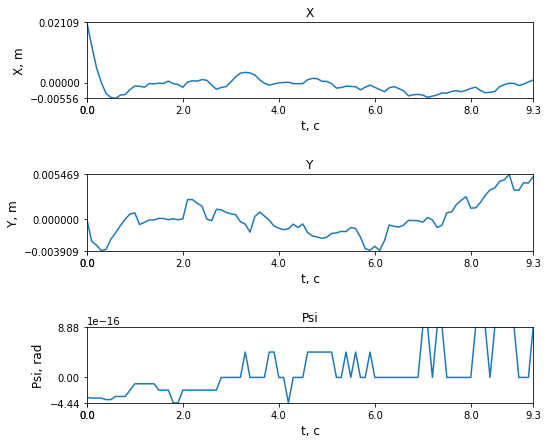

In [ ]:
plot_x_y_psi(ddf3_iv)

### Сравним визуально траектории

lab1

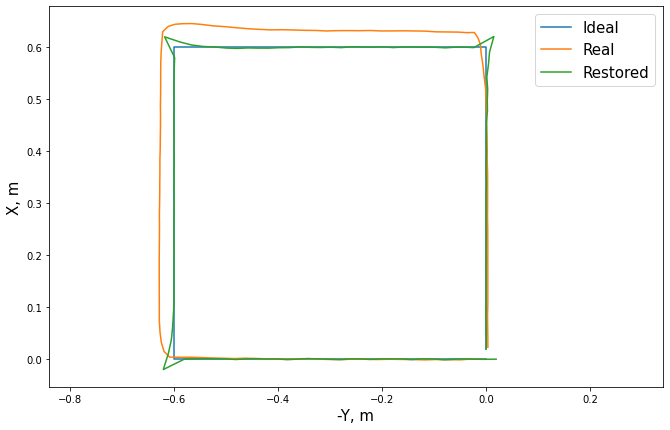

In [ ]:
plt.figure(figsize=(11, 7))
plt.plot(-df1_ideal['y0'], df1_ideal['x0'], label="Ideal")
plt.plot(-df1_real['y0'], df1_real['x0'], label="Real")
plt.plot(-df1_v['y0'], df1_v['x0'], label="Restored")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.xlim([-1, 0.5])
plt.legend(loc='upper right', fontsize=15)
plt.show()

lab2

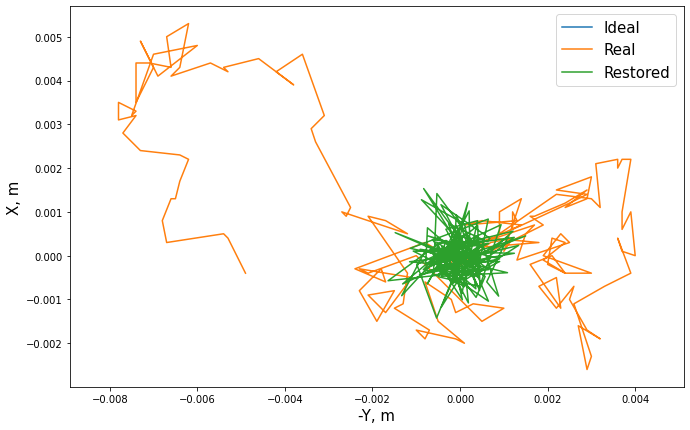

In [ ]:
plt.figure(figsize=(11, 7))
plt.plot(-df2_ideal['y0'], df2_ideal['x0'], label="Ideal")
plt.plot(-df2_real['y0'], df2_real['x0'], label="Real")
plt.plot(-df2_v['y0'], df2_v['x0'], label="Restored")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=15)
plt.show()

lab3

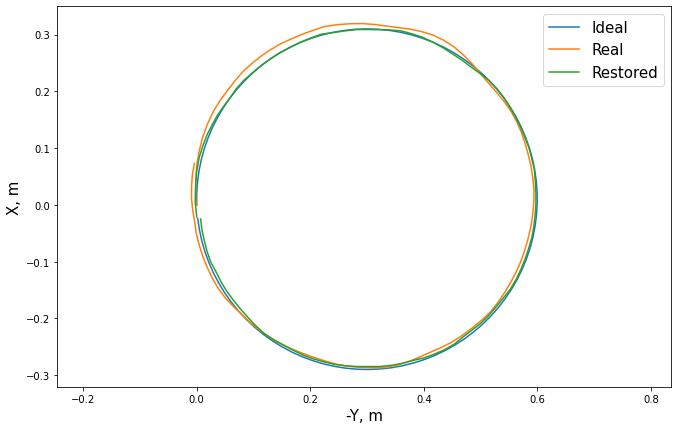

In [ ]:
plt.figure(figsize=(11, 7))
plt.plot(-df3_ideal['y0'], df3_ideal['x0'], label="Ideal")
plt.plot(-df3_real['y0'], df3_real['x0'], label="Real")
plt.plot(-df3_v['y0'], df3_v['x0'], label="Restored")
plt.xlabel("-Y, m", fontsize=15)
plt.ylabel("X, m", fontsize=15)
plt.axis('equal')
plt.legend(loc='upper right', fontsize=15)
plt.show()

### Найдём СКО и мат. ожидание для разниц идеальных координат с реальными и восстановленными и разниц идеальных скоростей с реальными

In [ ]:
def math_e(series):
  return series.sum()/len(series)

In [ ]:
def s_dev(series, Math_e):
  return (sum((series - Math_e)**2)/len(series))**(1/2)

In [ ]:
def get_table_Math_SKO(ddf, ddf_iv):
  df_math_sko = pd.DataFrame({ 
     'omega_1': [math_e(ddf['omega_1']),
           s_dev(ddf['omega_1'], math_e(ddf['omega_1'])),
           " - ",
           " - "], 
     'omega_2': [math_e(ddf['omega_2']),
           s_dev(ddf['omega_2'], math_e(ddf['omega_2'])),
           " - ",
           " - "],
     'omega_3': [math_e(ddf['omega_3']),
           s_dev(ddf['omega_3'], math_e(ddf['omega_3'])),
           " - ",
           " - "], 
     'omega_4': [math_e(ddf['omega_4']),
           s_dev(ddf['omega_4'], math_e(ddf['omega_4'])),
           " - ",
           " - "], 
     'Vx': [math_e(ddf['Vx_o']),
           s_dev(ddf['Vx_o'], math_e(ddf['Vx_o'])),
           " - ",
           " - "],
     'Vy': [math_e(ddf['Vy_o']),
           s_dev(ddf['Vy_o'], math_e(ddf['Vy_o'])),
           " - ",
           " - "],
     'dpsi': [math_e(ddf['dpsi']),
           s_dev(ddf['dpsi'], math_e(ddf['dpsi'])),
           " - ",
           " - "],
     'X': [math_e(ddf['x0']),
           s_dev(ddf['x0'], math_e(ddf['x0'])),
           math_e(ddf_iv['x0']),
           s_dev(ddf_iv['x0'], math_e(ddf_iv['x0']))], 
     'Y': [math_e(ddf['y0']),
           s_dev(ddf['y0'], math_e(ddf['y0'])),
           math_e(ddf_iv['y0']),
           s_dev(ddf_iv['y0'], math_e(ddf_iv['y0']))], 
     'Psi': [math_e(ddf['psi']),
           s_dev(ddf['psi'], math_e(ddf['psi'])),
           math_e(ddf_iv['psi']),
           s_dev(ddf_iv['psi'], math_e(ddf_iv['psi']))]},
      index=["Math_ir", "SKO_ir", "Math_iv", "SKO_iv"])
  return df_math_sko

In [ ]:
print("Лаб. 1")
print("Время запаздывания по x: ", dtzap1_x)
print("Время запаздывания по y: ", dtzap1_y)
print("Время запаздывания по psi: ", dtzap1_psi)
print("Мат. ожидание и CКО: ")
df_math_sko_1 = get_table_Math_SKO(ddf1, ddf1_iv)
df_math_sko_1

Лаб. 1
Время запаздывания по x:  -0.10085549005660967
Время запаздывания по y:  -0.09784377860459156
Время запаздывания по psi:  0.0
Мат. ожидание и CКО: 


,omega_1,omega_2,omega_3,omega_4,Vx,Vy,dpsi,X,Y,Psi
Math_ir,-0.043872,-0.041509,-0.036476,-0.036273,-0.001893,0.000295,0.000084,-0.017862,-0.011697,0.006200
SKO_ir,1.330214,1.062753,1.101175,1.268688,0.038456,0.043899,0.021456,0.015477,0.018120,0.006188
Math_iv,-,-,-,-,-,-,-,-0.000194,0.000032,0.000000
SKO_iv,-,-,-,-,-,-,-,0.003844,0.004378,0.000000


In [ ]:
print("Лаб. 2")
print("Время запаздывания по x: ", dtzap2_x)
print("Время запаздывания по y: ", dtzap2_y)
print("Время запаздывания по psi: ", dtzap2_psi)
print("Мат. ожидание и CКО: ")
df_math_sko_2 = get_table_Math_SKO(ddf2, ddf2_iv)
df_math_sko_2

Лаб. 2
Время запаздывания по x:  0.0
Время запаздывания по y:  0.0
Время запаздывания по psi:  7.855155598257399e-15
Мат. ожидание и CКО: 


,omega_1,omega_2,omega_3,omega_4,Vx,Vy,dpsi,X,Y,Psi
Math_ir,-0.142041,0.159277,-0.138986,0.103748,0.000029,-0.000328,0.017663,-0.000864,-0.000846,9.765043e-02
SKO_ir,0.449473,0.377798,0.359474,0.408691,0.005175,0.00582,0.045855,0.001856,0.003633,9.547080e-02
Math_iv,-,-,-,-,-,-,-,0.000016,-0.000028,3.266789e-17
SKO_iv,-,-,-,-,-,-,-,0.000518,0.000585,2.766822e-15


In [ ]:
print("Лаб. 3")
print("Время запаздывания по x: ", dtzap3_x)
print("Время запаздывания по y: ", dtzap3_y)
print("Время запаздывания по psi: ", dtzap3_psi)
print("Мат. ожидание и CКО: ")
df_math_sko_3 = get_table_Math_SKO(ddf3, ddf3_iv)
df_math_sko_3

Лаб. 3
Время запаздывания по x:  -0.10545756143157488
Время запаздывания по y:  -0.1019847367333574
Время запаздывания по psi:  -5.259395603502997e-16
Мат. ожидание и CКО: 


,omega_1,omega_2,omega_3,omega_4,Vx,Vy,dpsi,X,Y,Psi
Math_ir,-0.36223,-0.002887,-0.42091,0.039836,-0.008202,-0.000465,0.026626,-0.006803,-0.022222,8.070957e-02
SKO_ir,1.350572,0.411475,1.279298,0.232841,0.034882,0.021485,0.094604,0.039542,0.032820,1.034660e-01
Math_iv,-,-,-,-,-,-,-,-0.000852,-0.000012,9.695585e-17
SKO_iv,-,-,-,-,-,-,-,0.003409,0.002133,3.877305e-16


### Дисперсия, мат. ожидание и CКО для разности идеальных и реальных скоростей Vx, Vy, Om

lab1

In [ ]:
df_table_1 = df_math_sko_1[['Vx', 'Vy', 'dpsi']].head(2)
df_table_1.loc['Disper_ir'] = df_table_1.values[1]**2
df_table_1.head()

,Vx,Vy,dpsi
Math_ir,-0.001893,0.000295,0.000084
SKO_ir,0.038456,0.043899,0.021456
Disper_ir,0.001479,0.001927,0.00046


lab2

In [ ]:
df_table_2 = df_math_sko_2[['Vx', 'Vy', 'dpsi']].head(2)
df_table_2.loc['Disper_ir'] = df_table_2.values[1]**2
df_table_2.head()

,Vx,Vy,dpsi
Math_ir,0.000029,-0.000328,0.017663
SKO_ir,0.005175,0.00582,0.045855
Disper_ir,0.000027,0.000034,0.002103


lab3

In [ ]:
df_table_3 = df_math_sko_3[['Vx', 'Vy', 'dpsi']].head(2)
df_table_3.loc['Disper_ir'] = df_table_3.values[1]**2
df_table_3.head()

,Vx,Vy,dpsi
Math_ir,-0.008202,-0.000465,0.026626
SKO_ir,0.034882,0.021485,0.094604
Disper_ir,0.001217,0.000462,0.00895


### Мат. ожидание и CКО для разности идеальных и реальных координат X, Y, Psi

lab1

In [ ]:
df_math_sko_1[['X', 'Y', 'Psi']][2:4]

,X,Y,Psi
Math_iv,-0.000194,0.000032,0.0
SKO_iv,0.003844,0.004378,0.0


lab2

In [ ]:
df_math_sko_2[['X', 'Y', 'Psi']].head(2)

,X,Y,Psi
Math_ir,-0.000864,-0.000846,0.097650
SKO_ir,0.001856,0.003633,0.095471


lab3

In [ ]:
df_math_sko_3[['X', 'Y', 'Psi']].head(2)

,X,Y,Psi
Math_ir,-0.006803,-0.022222,0.080710
SKO_ir,0.039542,0.032820,0.103466


### Мат. ожидание и CКО для разности идеальных и восстановленных координат X, Y, Psi

lab1

In [ ]:
df_math_sko_1[['X', 'Y', 'Psi']][2:4]

,X,Y,Psi
Math_iv,-0.000194,0.000032,0.0
SKO_iv,0.003844,0.004378,0.0


lab2

In [ ]:
df_math_sko_2[['X', 'Y', 'Psi']][2:4]

,X,Y,Psi
Math_iv,0.000016,-0.000028,3.266789e-17
SKO_iv,0.000518,0.000585,2.766822e-15


lab3

In [ ]:
df_math_sko_3[['X', 'Y', 'Psi']][2:4]

,X,Y,Psi
Math_iv,-0.000852,-0.000012,9.695585e-17
SKO_iv,0.003409,0.002133,3.877305e-16


### Во сколько раз улучшились параметры распределения при учёте расмотренной модели ошибок

lab1

In [ ]:
pd.DataFrame(df_math_sko_1[['X', 'Y', 'Psi']].values[0:2] / df_math_sko_1[['X', 'Y', 'Psi']].values[2:4], 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


,X,Y,Psi
Math,92.005861,-363.092963,inf
SKO,4.025870,4.138360,inf


lab2

In [ ]:
pd.DataFrame(df_math_sko_2[['X', 'Y', 'Psi']].values[0:2] / df_math_sko_2[['X', 'Y', 'Psi']].values[2:4], 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,-53.293102,30.364315,2.989187e+15
SKO,3.581357,6.212780,3.450558e+13


lab3

In [ ]:
pd.DataFrame(df_math_sko_3[['X', 'Y', 'Psi']].values[0:2] / df_math_sko_3[['X', 'Y', 'Psi']].values[2:4], 
             columns=['X', 'Y', 'Psi'], index=["Math", "SKO"])

,X,Y,Psi
Math,7.987500,1871.893274,8.324364e+14
SKO,11.597954,15.387307,2.668504e+14
